In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [5]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [6]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,58.787641,0.195218,11.773376,11.786253,19.617184
1,58.563908,3.326752,10.213829,6.414394,16.941983
2,58.406577,2.517634,14.337681,4.720320,24.769560
3,44.075299,12.946438,8.393966,15.033074,15.946121
4,57.781616,4.986450,8.613026,20.152762,14.450574


<Axes: ylabel='Density'>

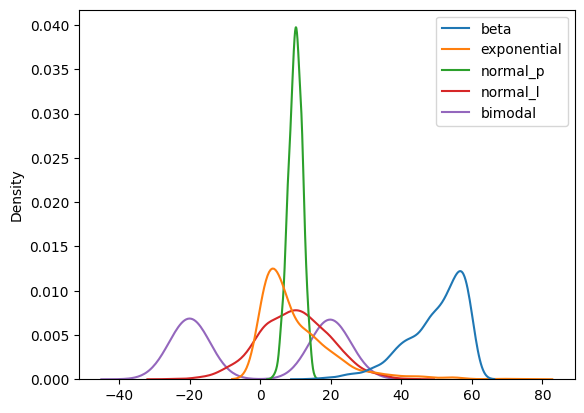

In [7]:
sns.kdeplot(data=df)

In [8]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.878601,10.375662,9.997994,9.731795,-0.032983
std,8.427612,10.581758,1.957810,9.905693,20.227352
min,15.137990,0.033040,3.501658,-24.481533,-29.772546
25%,44.960336,2.928981,8.689271,2.682643,-19.947692
50%,52.084515,6.771584,10.065612,9.727837,-0.075480
75%,56.690161,14.677461,11.403703,16.482771,19.832547
max,59.997454,74.834958,15.369393,41.808371,30.070528


<Axes: ylabel='Density'>

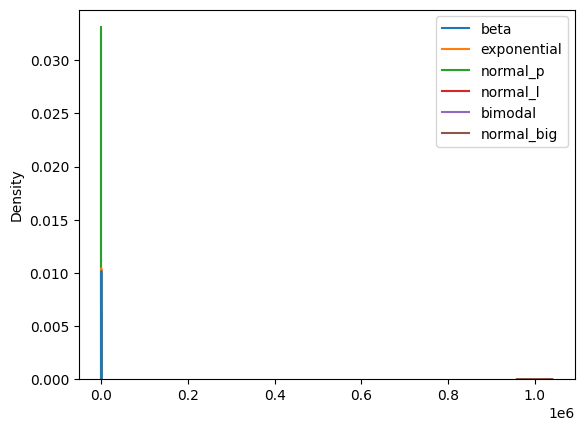

In [9]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

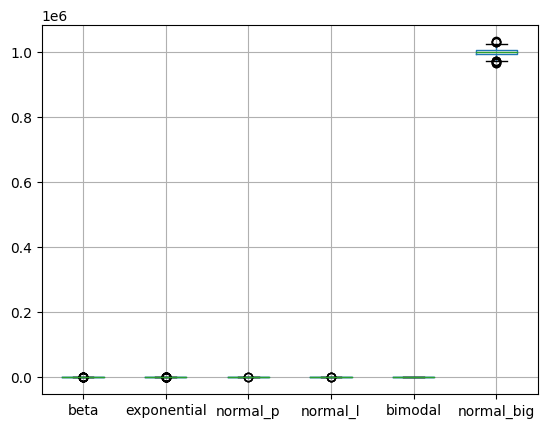

In [10]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [11]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [12]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [13]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.973031,0.002168,0.696992,0.547109,0.825321,0.491935
1,0.968044,0.044032,0.565581,0.466073,0.780617,0.103466
2,0.964536,0.033216,0.913066,0.440517,0.911419,0.753746
3,0.645066,0.172635,0.412236,0.596088,0.763976,0.592193
4,0.950605,0.066220,0.430695,0.673320,0.738985,0.535003


<Axes: ylabel='Density'>

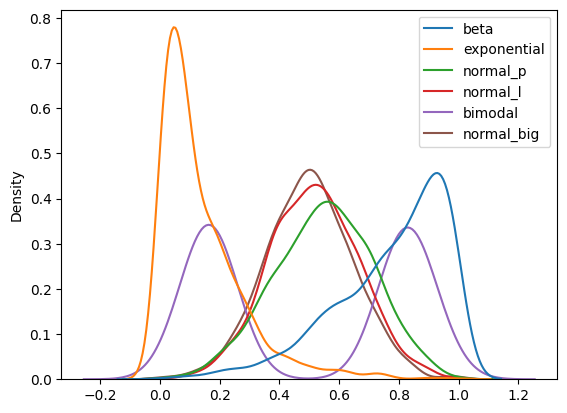

In [14]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<Axes: >

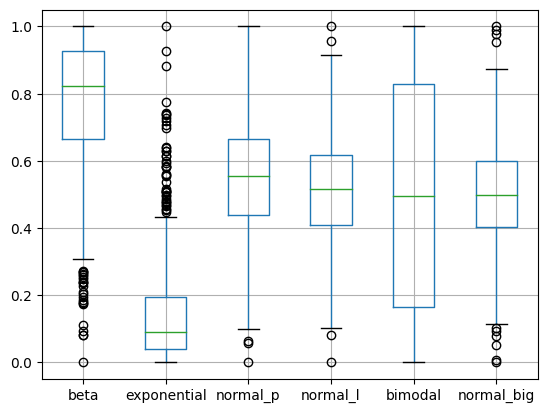

In [15]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [16]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.774432,0.138267,0.547395,0.516117,0.496959,0.500090
std,0.187867,0.141464,0.164969,0.149430,0.338007,0.147398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.664795,0.038715,0.437119,0.409778,0.164177,0.401929
50%,0.823606,0.090085,0.553092,0.516057,0.496249,0.499026
75%,0.926274,0.195776,0.665843,0.617957,0.828920,0.598739
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [18]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [19]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[15.1379896922932,
 0.03304028556542364,
 3.50165804515885,
 -24.481532599501307,
 -29.772546316706112,
 966074.5679945791]

In [20]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [21]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.99745416580035,
 74.83495834875268,
 15.369392653902032,
 41.80837078988449,
 30.07052830406629,
 1033001.5205854684]

In [22]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0]